In [7]:
import sys
import pdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from cftime import DatetimeNoLeap as date
from matplotlib.colors import TwoSlopeNorm

plt.ioff()

sys.path.insert(1, '/global/homes/j/jhollo/repos/climate_analysis/CLDERA/TEM/limvar_analysis_NERSC')
import plotting_utils as putil

1992-01-01-1992-02-01...
-------- processing ensemble zonal mean data...
doing slicing and averaging...
merging data
ensemble members found: 18
data shape after member concat: (18, 180, 72)
cf shape after member concat: (18, 180, 72)
getting impact
getting data ensemble mean
getting cf ensemble mean
getting impact ensemble mean
getting ttest
getting coherence

-------- processing TEM data for tracer 0...
doing slicing and averaging...
merging tem data
tem data shape after member concat: (18, 180, 72)
tem cf shape after member concat: (18, 180, 72)
getting tem impact
getting tem ensemble mean
getting tem cf ensemble mean
getting tem impact ensemble mean
getting ttest
getting coherence

-------- processing TEM budget data for tracer 0...
doing slicing and averaging...
merging budget data
budget data shape after member concat: (18, 180, 72)
budget cf shape after member concat: (18, 180, 72)
getting budget impact
getting budget ensemble mean
getting budget cfa ensemble mean
getting budget 

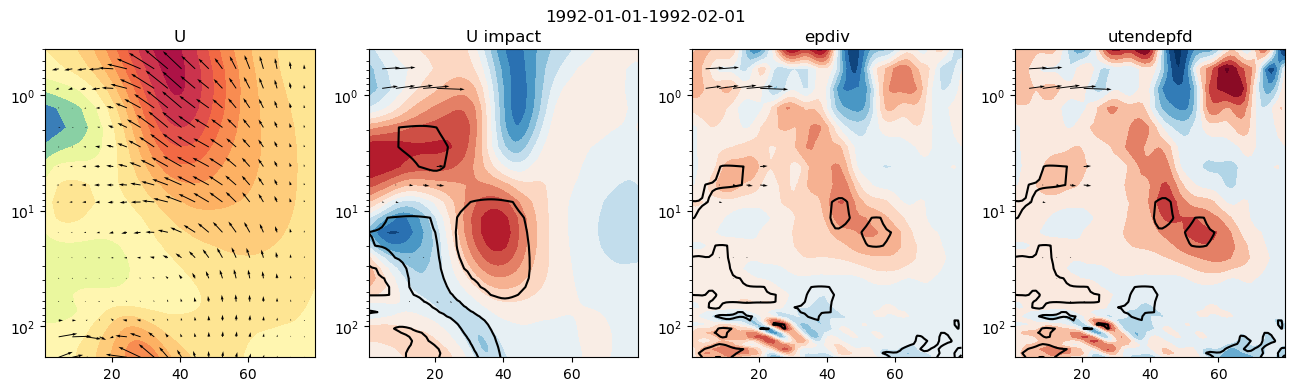

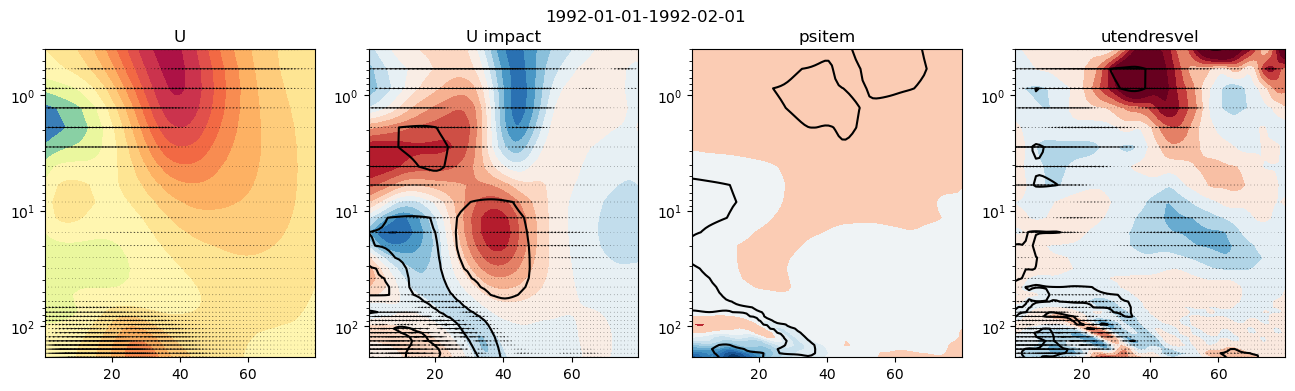

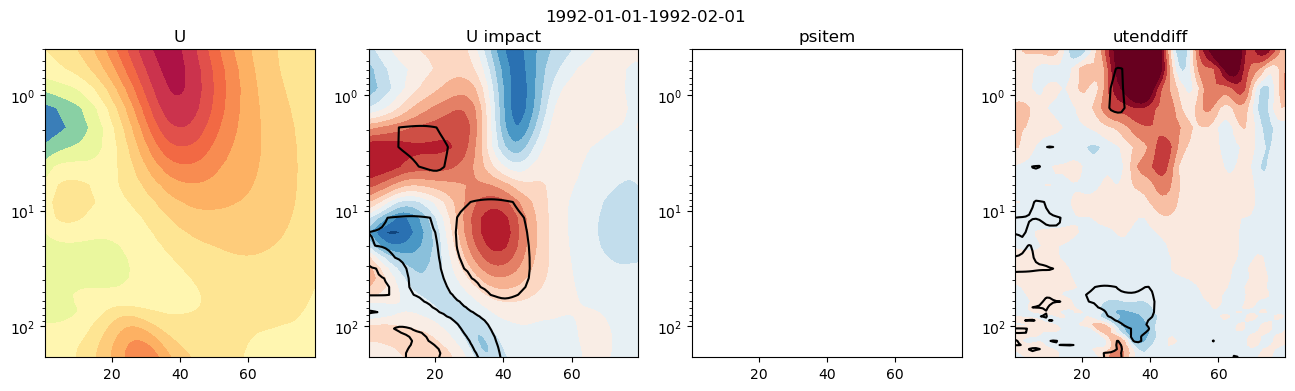

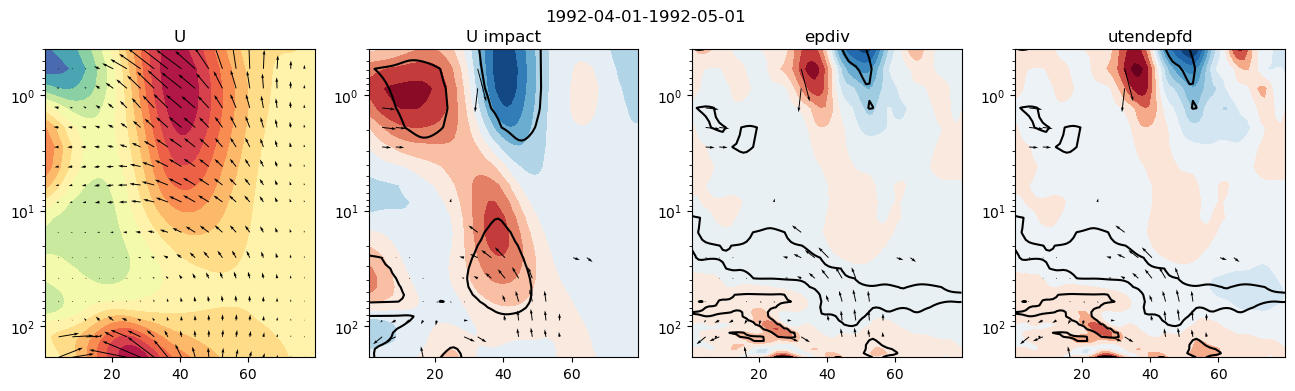

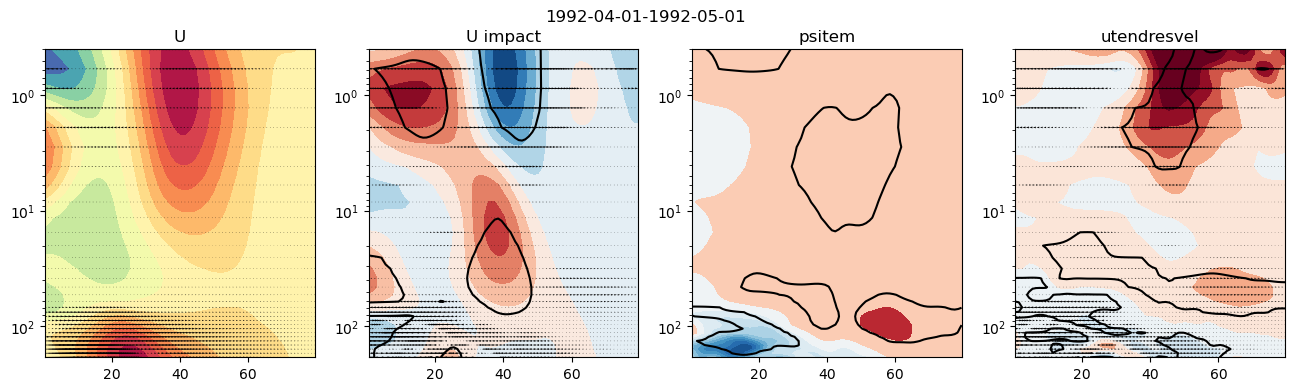

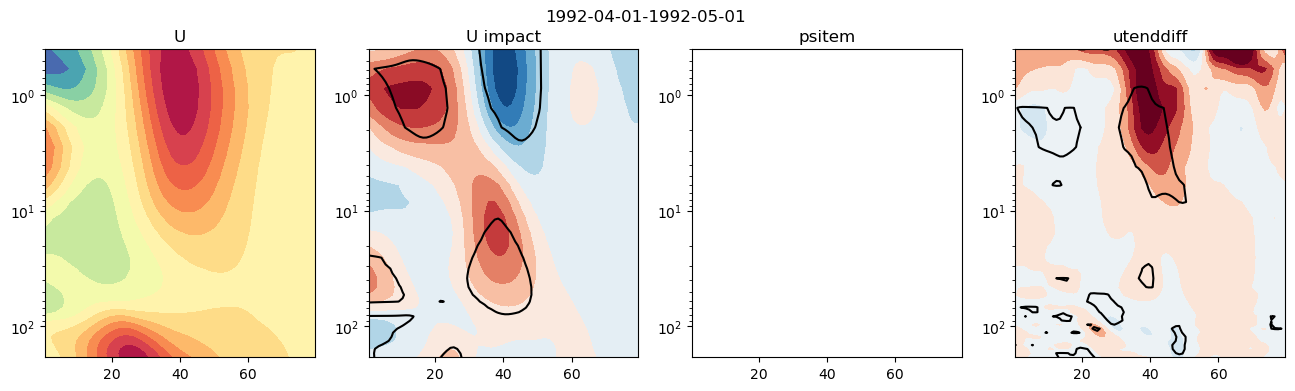

In [37]:
overwrite = False

if(0):
    #AS
    #tmin = date(1991, 8, 1)
    #tmax = date(1991, 9, 30)
    # ON
    #tmin = date(1991, 10, 1)
    #tmax = date(1991, 11, 30)
    #DJF
    tmin = date(1991, 12, 1)
    tmax = date(1992, 2, 28)
    u     = putil.get_daily_variable('U', tmin=tmin, tmax=tmax, overwrite=overwrite)
    epdiv = putil.get_daily_variable('epdiv', tmin=tmin, tmax=tmax, overwrite=overwrite)
    epfy  = putil.get_daily_variable('epfy', tmin=tmin, tmax=tmax, overwrite=overwrite)
    epfz  = putil.get_daily_variable('epfz', tmin=tmin, tmax=tmax, overwrite=overwrite)

# regions of impact in NH midlats
#timelim = [[date(1991, 8, 1), date(1991, 10, 31)], 
#           [date(1992, 2, 1), date(1992, 4, 30)], 
#           [date(1992, 7, 1), date(1992, 9, 30)]]
# leading, exiting edge of impacts
#timelim = [[date(1991, 7, 1), date(1991, 8, 1)], 
#           [date(1991, 10, 20), date(1991, 11, 20)]]
timelim = [[date(1992, 1, 1), date(1992, 2, 1)], 
           [date(1992, 4, 1), date(1992, 5, 1)]]

for i in range(len(timelim)):
    tmin = timelim[i][0]
    tmax  = timelim[i][1]
    u     = putil.get_daily_variable('U', tmin=tmin, tmax=tmax, overwrite=overwrite)
    utendepfd = putil.get_daily_variable('utendepfd', tmin=tmin, tmax=tmax, overwrite=overwrite)
    epdiv = putil.get_daily_variable('epdiv', tmin=tmin, tmax=tmax, overwrite=overwrite)
    epfy  = putil.get_daily_variable('epfy', tmin=tmin, tmax=tmax, overwrite=overwrite)
    epfz  = putil.get_daily_variable('epfz', tmin=tmin, tmax=tmax, overwrite=overwrite)
    vtem  = putil.get_daily_variable('vtem', tmin=tmin, tmax=tmax, overwrite=overwrite)
    wtem  = putil.get_daily_variable('wtem', tmin=tmin, tmax=tmax, overwrite=overwrite)
    psitem  = putil.get_daily_variable('psitem', tmin=tmin, tmax=tmax, overwrite=overwrite)
    utendresvel  = putil.get_daily_variable('UTRESVEL', tmin=tmin, tmax=tmax, overwrite=overwrite)
    utenddiff  = putil.get_daily_variable('UTDIFF', tmin=tmin, tmax=tmax, overwrite=overwrite)
    print('{}-{}...'.format(str(tmin).split(' ')[0], str(tmax).split(' ')[0]), end='\r')

    # delete EP Flux vectors for which p-value is > 0.05
    mask = np.logical_or(epfy['pval']<0.05, epfz['pval']<0.05)
    epfy_impact = epfy['impact'].where(mask)
    epfz_impact = epfz['impact'].where(mask)

    # select stratosphere
    pmin, pmax     = 0.3, 200
    latmin, latmax = 0, 80
    args = {'pmin':pmin, 'pmax':pmax, 'latmin':latmin, 'latmax':latmax}
    epfy_impact = putil.do_slicing(epfy_impact, **args)
    epfz_impact = putil.do_slicing(epfz_impact, **args)
    epfy_cf     = putil.do_slicing(epfy['cfmean'], **args)
    epfz_cf     = putil.do_slicing(epfz['cfmean'], **args)
    u_cf        = putil.do_slicing(u['cfmean'], **args)
    u_impact    = putil.do_slicing(u['impact'], **args)
    u_pval      = putil.do_slicing(u['pval'], **args)
    epdiv_cf        = putil.do_slicing(epdiv['cfmean'], **args)
    epdiv_impact    = putil.do_slicing(epdiv['impact'], **args)
    epdiv_pval      = putil.do_slicing(epdiv['pval'], **args)
    utendepfd_cf        = putil.do_slicing(utendepfd['cfmean'], **args)
    utendepfd_impact    = putil.do_slicing(utendepfd['impact'], **args)
    utendepfd_pval      = putil.do_slicing(utendepfd['pval'], **args)
    vtem_cf        = putil.do_slicing(vtem['cfmean'], **args)
    vtem_impact    = putil.do_slicing(vtem['impact'], **args)
    vtem_pval      = putil.do_slicing(vtem['pval'], **args)
    wtem_cf        = putil.do_slicing(wtem['cfmean'], **args)
    wtem_impact    = putil.do_slicing(wtem['impact'], **args)
    wtem_pval      = putil.do_slicing(wtem['pval'], **args)
    utendresvel_cf        = putil.do_slicing(utendresvel['cfmean'], **args)
    utendresvel_impact    = putil.do_slicing(utendresvel['impact'], **args)
    utendresvel_pval      = putil.do_slicing(utendresvel['pval'], **args)
    psitem_cf        = putil.do_slicing(psitem['cfmean'], **args)
    psitem_impact    = putil.do_slicing(psitem['impact'], **args)
    psitem_pval      = putil.do_slicing(psitem['pval'], **args)
    utenddiff_cf        = putil.do_slicing(utenddiff['cfmean'], **args)
    utenddiff_impact    = putil.do_slicing(utenddiff['impact'], **args)
    utenddiff_pval      = putil.do_slicing(utenddiff['pval'], **args)

    # ---------- plot EP forcing
    lat = epfy_impact.lat
    plev = epfy_impact.plev
    
    fig = plt.figure(figsize=(16,4))
    ax1 = fig.add_subplot(141)
    ax2 = fig.add_subplot(142)
    ax3 = fig.add_subplot(143)
    ax4 = fig.add_subplot(144)
    for ax in [ax1, ax2, ax3, ax4]:
        ax.set_yscale('log')
        ax.invert_yaxis()
        ax.set_ylim([max(plev), min(plev)])
        ax.set_xlim([min(lat), max(lat)])
    dslat = 4
    dsp = 1.5
    
    Fx_cf, Fy_cf = putil.scale_EP_flux_vectors(fig, ax1, epfy_cf, epfz_cf, dslat=dslat, dsp=dsp)
    Fx_impact, Fy_impact = putil.scale_EP_flux_vectors(fig, ax2, epfy_impact, epfz_impact, dslat=dslat, dsp=dsp, norm=False)

    cmap = 'Spectral_r'
    cmapi = 'RdBu_r'
    norm = TwoSlopeNorm(vcenter=0)
    ax1.contourf(lat, plev, u_cf.T, cmap=cmap, levels=12, norm=norm)
    ax1.set_title('U')
    norm = TwoSlopeNorm(vcenter=0)
    ax2.contourf(lat, plev, u_impact.T, cmap=cmapi, levels=12, norm=norm)
    ax2.contour(lat, plev, u_pval.T, colors='k', levels=[0.05])
    ax2.set_title('U impact')
    norm = TwoSlopeNorm(vcenter=0)
    ax3.contourf(lat, plev, epdiv_impact.T, cmap=cmapi, levels=12, norm=norm)
    ax3.contour(lat, plev, epdiv_pval.T, colors='k', levels=[0.05])
    ax3.set_title('epdiv')
    norm = TwoSlopeNorm(vcenter=0)
    cfu = ax4.contourf(lat, plev, utendepfd_impact.T, cmap=cmapi, levels=12, norm=norm, extend='both')
    ax4.contour(lat, plev, utendepfd_pval.T, colors='k', levels=[0.05])
    ax4.set_title('utendepfd')

    # ------ ep flux vectors
    LAT, PLEV = np.meshgrid(Fx_cf.lat, Fx_cf.plev)
    ax1.quiver(LAT, PLEV, Fx_cf.T, Fy_cf.T)
    ax2.quiver(LAT, PLEV, Fx_impact.T, Fy_impact.T)
    ax3.quiver(LAT, PLEV, Fx_impact.T, Fy_impact.T)
    ax4.quiver(LAT, PLEV, Fx_impact.T, Fy_impact.T)
    
    fig.suptitle('{}-{}'.format(str(tmin).split(' ')[0], str(tmax).split(' ')[0]))
    
    
    # ---------- plot residual velocity forcing
    fig = plt.figure(figsize=(16,4))
    ax1 = fig.add_subplot(141)
    ax2 = fig.add_subplot(142)
    ax3 = fig.add_subplot(143)
    ax4 = fig.add_subplot(144)
    for ax in [ax1, ax2, ax3, ax4]:
        ax.set_yscale('log')
        ax.invert_yaxis()
        ax.set_ylim([max(plev), min(plev)])
        ax.set_xlim([min(lat), max(lat)])
    dslat = 4
    dsp = 1.5
    
    cmap = 'Spectral_r'
    cmapi = 'RdBu_r'
    norm = TwoSlopeNorm(vcenter=0)
    ax1.contourf(lat, plev, u_cf.T, cmap=cmap, levels=12, norm=norm)
    ax1.set_title('U')
    norm = TwoSlopeNorm(vcenter=0)
    ax2.contourf(lat, plev, u_impact.T, cmap=cmapi, levels=12, norm=norm)
    ax2.contour(lat, plev, u_pval.T, colors='k', levels=[0.05])
    ax2.set_title('U impact')
    norm = TwoSlopeNorm(vcenter=0)
    ax3.contourf(lat, plev, psitem_impact.T, cmap=cmapi, levels=12, norm=norm)
    ax3.contour(lat, plev, psitem_pval.T, colors='k', levels=[0.05])
    ax3.set_title('psitem')
    norm = TwoSlopeNorm(vcenter=0)
    ax4.contourf(lat, plev, utendresvel_impact.T, cmap=cmapi, levels=cfu.levels, norm=norm, extend='both')
    ax4.contour(lat, plev, utendresvel_pval.T, colors='k', levels=[0.05])
    ax4.set_title('utendresvel')
    
    # ------ residual velocity vectors
    LAT, PLEV = np.meshgrid(vtem_cf.lat, vtem_cf.plev)
    ax1.quiver(LAT, PLEV, vtem_cf.T, wtem_cf.T)
    ax2.quiver(LAT, PLEV, vtem_impact.T, wtem_impact.T)
    ax4.quiver(LAT, PLEV, vtem_impact.T, wtem_impact.T)
    
    fig.suptitle('{}-{}'.format(str(tmin).split(' ')[0], str(tmax).split(' ')[0]))
    
    # ---------- plot unresolved forcing
    fig = plt.figure(figsize=(16,4))
    ax1 = fig.add_subplot(141)
    ax2 = fig.add_subplot(142)
    ax3 = fig.add_subplot(143)
    ax4 = fig.add_subplot(144)
    for ax in [ax1, ax2, ax3, ax4]:
        ax.set_yscale('log')
        ax.invert_yaxis()
        ax.set_ylim([max(plev), min(plev)])
        ax.set_xlim([min(lat), max(lat)])
    dslat = 4
    dsp = 1.5
    
    cmap = 'Spectral_r'
    cmapi = 'RdBu_r'
    norm = TwoSlopeNorm(vcenter=0)
    ax1.contourf(lat, plev, u_cf.T, cmap=cmap, levels=12, norm=norm)
    ax1.set_title('U')
    norm = TwoSlopeNorm(vcenter=0)
    ax2.contourf(lat, plev, u_impact.T, cmap=cmapi, levels=12, norm=norm)
    ax2.contour(lat, plev, u_pval.T, colors='k', levels=[0.05])
    ax2.set_title('U impact')
    norm = TwoSlopeNorm(vcenter=0)
    #ax3.contourf(lat, plev, psitem_impact.T, cmap=cmapi, levels=12, norm=norm)
    #ax3.contour(lat, plev, psitem_pval.T, colors='k', levels=[0.05])
    ax3.set_title('psitem')
    norm = TwoSlopeNorm(vcenter=0)
    ax4.contourf(lat, plev, utenddiff_impact.T, cmap=cmapi, levels=cfu.levels, norm=norm, extend='both')
    ax4.contour(lat, plev, utenddiff_pval.T, colors='k', levels=[0.05])
    ax4.set_title('utenddiff')
    
    fig.suptitle('{}-{}'.format(str(tmin).split(' ')[0], str(tmax).split(' ')[0]))

plt.show()